# Magnetic and Diagenetic Analyses of van Peer et al. (2017)
_____

Paper doi: https://doi.org/10.1002/2017GC007185

Core: IODP Expedition 342 Site U1406
Lat/long: 40°21.0′N, 51°39.0′W
Water depth: 3798.9 m

Data in analysis: Magnetite ppm (from Ms measurements), sedimentation rate, total organic carbon, pore water chemistry.

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_fns
%matplotlib inline
plt.rcParams["font.family"] = "Avenir"

In [2]:
# read in data
magnetite = pd.read_excel("data/vanPeer2017.xlsx", sheet_name="Ms")
TOC = pd.read_excel("data/vanPeer2017.xlsx", sheet_name="TOC")
geochem = pd.read_excel("data/vanPeer2017.xlsx", sheet_name="geochem")
sed_rates = pd.read_excel("data/vanPeer2017.xlsx", sheet_name="sed rates")

# convert Ms to magnetite (ppm)
magnetite["Magnetite [ppm]"] = (magnetite["Ms [Am2/kg]"] * 10**6) / 92
# convert cm/kyr sed rate to m/Ma
sed_rates["LSR [m/Ma]"] = (sed_rates["LSR (cm/kyr)"] * 1000) / 100


In [3]:
# create dataframes of what we are interested in (from dictionaries)
magn_df = pd.DataFrame({"Depth [mbsf]":magnetite["Depth (mbsf)"], "Magnetite [ppm]":magnetite["Magnetite [ppm]"]})

geochem_df = pd.DataFrame({"Depth [mbsf]":geochem["depth (mbsf)"], "Sulfate [mM]" : geochem["Sulfate (mM)"], "Fe 2+ [uM]" : geochem["Fe (uM)"]})

TOC_df = pd.DataFrame({"Depth [mbsf]":TOC["Depth (mbsf)"], "TOC [wt. %]":TOC["TOC cor (wt%)"]})

sed_rates_df = pd.DataFrame({"Depth [mbsf]":sed_rates["Depth (mbsf)"], "Sedimentation Rate [m/Ma]":sed_rates["LSR [m/Ma]"]})

# next, append them all together. We can use the result for comparison plots
# after all the appending, sort the whole thing by depth and reset index
comb_df = magn_df.append(geochem_df).append(TOC_df).append(sed_rates_df).sort_values(by="Depth [mbsf]").reset_index(drop=True)

In [4]:
# next task is to interpolate between non-magnetite data points
# passing in columns to interpolate (except for sed rate)
interpolated = data_fns.interpolate(comb_df, ["Sulfate [mM]", "TOC [wt. %]", "Fe 2+ [uM]"], sed_rates=True)


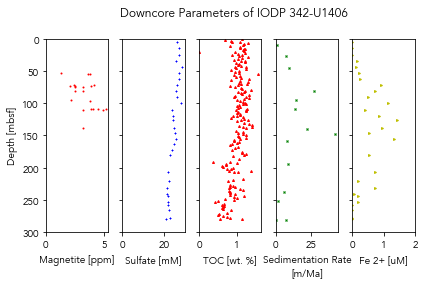

In [8]:
# plot downcore figures
colors = ["r", "b", "r", "g", "y", "k", "c"]
markers = [".", "+", "^", "x", ">", "<", "v"]
dc_fig, dc_axs = data_fns.plot_dc(["Magnetite [ppm]", "Sulfate [mM]", "TOC [wt. %]", "Sedimentation Rate [m/Ma]", "Fe 2+ [uM]"], comb_df, colors, markers)
dc_fig.suptitle("Downcore Parameters of IODP 342-U1406", x=0.55)
dc_axs[3].set_xlabel("Sedimentation Rate\n[m/Ma]")
dc_axs[1].set_xlim(xmax=30)
dc_axs[4].set_xlim(xmax=2)
dc_axs[0].set_ylim(300,0)
#dc_axs[0].set_xlim(0, 6)
dc_fig.tight_layout()
dc_fig.savefig("outputs/vanPeer2017/dc_all.pdf")

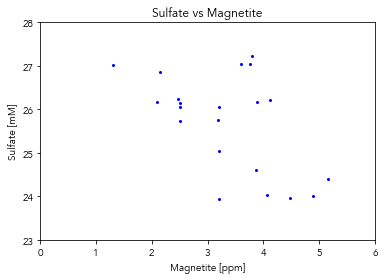

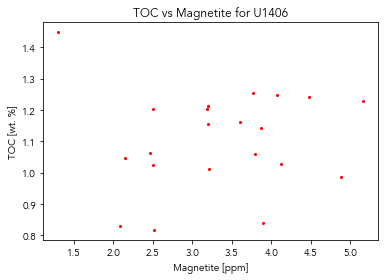

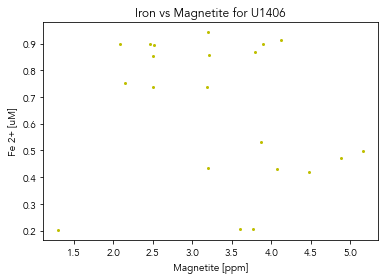

In [9]:
# plot comparison figures
comp_figs, comp_axs = data_fns.plot_comp(["Sulfate [mM]", "TOC [wt. %]", "Fe 2+ [uM]"], interpolated, ["b", "r", "y"], [".", ".", "."], markersize=4)

# label and save these if you want
comp_axs[0].set(xlabel="Magnetite [ppm]", ylabel="Sulfate [mM]", title="Sulfate vs Magnetite", xlim=[0,6], ylim=[23,28])
comp_figs[0].savefig("outputs/vanPeer2017/vanPeer2017_sulf-comp.pdf")

comp_axs[1].set(xlabel="Magnetite [ppm]", ylabel="TOC [wt. %]", title="TOC vs Magnetite for U1406")
comp_figs[1].savefig("outputs/vanPeer2017/vanPeer2017_TOC-comp.pdf")

comp_axs[2].set(xlabel="Magnetite [ppm]", ylabel="Fe 2+ [uM]", title="Iron vs Magnetite for U1406")
comp_figs[2].savefig("outputs/vanPeer2017/vanPeer2017_fe-comp.pdf")

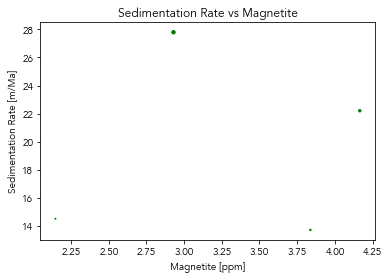

In [7]:
# sed rates comp plot
sed_fig, sed_ax, sed_sc = data_fns.sed_avg_plot(interpolated)
sed_ax.set(xlabel="Magnetite [ppm]", ylabel="Sedimentation Rate [m/Ma]", title = "Sedimentation Rate vs Magnetite")
sed_fig.savefig("outputs/vanPeer2017/vanPeer2017_sed-comp.pdf")


In [8]:
# last thing to do is add the dataframes we used to the compilation excel doc
# put the raw and interpolated data in separate files
data_fns.write_output(interpolated, "IODP 342-U1406", "data/comp_inter.xlsx")
data_fns.write_output(comb_df, "IODP 342-U1406", "data/comp_raw.xlsx")